In [17]:
import matplotlib.pyplot as plt
from scipy import spatial
import numpy as np

from importlib import reload

%reload_ext autoreload
%autoreload 2
    
import pyturb
reload(pyturb)

from time import sleep, perf_counter

import sys
sys.path.append('/Users/00075868/MyCodes/AnalysisTools/')
import analysistools
import gc

In [18]:
# Tools to generate turbulent velocity fields
turb = pyturb.CreateTurbulentVelocityField(grid_size=64,v_turb=10.,box_size=10,seed=143289)
# Tools to measure velocity fields
mturb = pyturb.measure_turbulence.MeasureVelocityField()
# Tools to generate gridded velocity fields given particle data
gt = pyturb.GriddingTools()


In [19]:
resolution = [32, 64]
seed = np.ones(len(resolution),dtype=np.int64)*turb.seed
vel_field = [None]*len(resolution)
vel_field_smooth = [None]*len(resolution)

for i,res in enumerate(resolution):
    print(f"Generating velocity field data at {res:d} mesh resolution")
    # Generate velocity field at desired resolution
    tstart=perf_counter()
    turb = pyturb.CreateTurbulentVelocityField(grid_size=res,v_turb=10.,box_size=10,seed=seed[i])    
    vel_field[i] = turb.generate_kolmogorov_field(energy_spectrum_index=5./3., energy_scale=1.0)
    tfinish=perf_counter()
    print(f"Finished generating velocity field in {tfinish-tstart:.4f}")
    # Generate a gridded version of the velocity field
    (vx,vy,vz) = (turb.vx.ravel(),turb.vy.ravel(),turb.vz.ravel())
    vel = np.stack([vx, vy, vz], axis=-1)
    (x,y,z) = (turb.X.ravel(),turb.Y.ravel(),turb.Z.ravel())
    pos = np.stack([x, y, z], axis=-1)
    grid_limits =  np.array([0,1,0,1,0,1], dtype=np.float64)*turb.box_size
    grid_size = (res,res,res)
    tstart=perf_counter()
    vel_field_smooth[i] = gt.smooth_to_grid(pos, vel, grid_size, grid_limits, method="CIC")
    tfinish=perf_counter()
    print(f"Finished smoothing velocity field from point data in {tfinish-tstart:.4f}\n")
    
print("Finished generating velocity fields")


Generating velocity field data at 32 mesh resolution
Finished generating velocity field in 0.0117
Finished smoothing velocity field from point data in 0.0085

Generating velocity field data at 64 mesh resolution
Finished generating velocity field in 0.0613
Finished smoothing velocity field from point data in 0.0675

Finished generating velocity fields


In [20]:
# fig, axes = gt.plot_3d_projections(vel_field[0], grid_limits, mode='projection', slice_width=3, projection='mean', cmap='plasma', units='kpc', title="Turbulent Velocity Field - N=32")
# fig, axes = gt.plot_3d_projections(vel_field[1], grid_limits, mode='projection', slice_width=3, projection='mean', cmap='plasma', units='kpc', title="Turbulent Velocity Field - N=64")
# fig, axes = gt.plot_3d_projections(vel_field[2], grid_limits, mode='projection', slice_width=3, projection='mean', cmap='plasma', units='kpc', title="Turbulent Velocity Field - N=128")
# fig, axes = gt.plot_3d_projections(vel_field[3], grid_limits, mode='projection', slice_width=3, projection='mean', cmap='plasma', units='kpc', title="Turbulent Velocity Field - N=256")

In [21]:
# fig, axes = gt.plot_3d_projections(vel_field_smooth[0], grid_limits, mode='projection', slice_width=3, projection='mean', cmap='plasma', units='kpc', title="Turbulent Velocity Field - N=32 (CIC Smoothed)")
# fig, axes = gt.plot_3d_projections(vel_field_smooth[1], grid_limits, mode='projection', slice_width=3, projection='mean', cmap='plasma', units='kpc', title="Turbulent Velocity Field - N=64 (CIC Smoothed)")
# fig, axes = gt.plot_3d_projections(vel_field_smooth[2], grid_limits, mode='projection', slice_width=3, projection='mean', cmap='plasma', units='kpc', title="Turbulent Velocity Field - N=128 (CIC Smoothed)")
# fig, axes = gt.plot_3d_projections(vel_field_smooth[3], grid_limits, mode='projection', slice_width=3, projection='mean', cmap='plasma', units='kpc', title="Turbulent Velocity Field - N=256 (CIC Smoothed)")

In [22]:
# # Compute for the velocity field generated by pyturb...
# k0,pk0,_=mturb.fft().compute_power_spectrum(vel_field[0], box_size=turb.box_size, component='energy', method='radial')
# # ... and compute for the velocity field constructed from the positions and velocities
# k1,pk1,_=mturb.fft().compute_power_spectrum(vel_field[1], box_size=turb.box_size, component='energy', method='radial')
# # ... and compute for the velocity field constructed from the positions and velocities
# k2,pk2,_=mturb.fft().compute_power_spectrum(vel_field[2], box_size=turb.box_size, component='energy', method='radial')
# # ... and compute for the velocity field constructed from the positions and velocities
# k3,pk3,_=mturb.fft().compute_power_spectrum(vel_field[3], box_size=turb.box_size, component='energy', method='radial')


In [23]:
# # Compute for the velocity field generated by pyturb...
# ks0,pks0,_=mturb.fft().compute_power_spectrum(vel_field_smooth[0], box_size=turb.box_size, component='energy', method='radial')
# # ... and compute for the velocity field constructed from the positions and velocities
# ks1,pks1,_=mturb.fft().compute_power_spectrum(vel_field_smooth[1], box_size=turb.box_size, component='energy', method='radial')
# # ... and compute for the velocity field constructed from the positions and velocities
# ks2,pks2,_=mturb.fft().compute_power_spectrum(vel_field_smooth[2], box_size=turb.box_size, component='energy', method='radial')
# # ... and compute for the velocity field constructed from the positions and velocities
# ks3,pks3,_=mturb.fft().compute_power_spectrum(vel_field_smooth[3], box_size=turb.box_size, component='energy', method='radial')

In [24]:
# plt.xlabel(r"k [$kpc^{-1}$]")
# plt.ylabel(r"P$_\text{turb}$(k) [$kpc^{3}$]")
# plt.xscale("log")
# plt.yscale("log")
# plt.plot(k0,pk0,color="red",label="N=32")
# plt.plot(k1,pk1,color="blue",label="N=64")
# plt.plot(k2,pk2,color="green",label="N=128")
# plt.plot(k3,pk3,color="orange",label="N=256")

# plt.plot(ks0,pks0,":",color="red",label="N=32 (Smoothed)")
# plt.plot(ks1,pks1,":",color="blue",label="N=64 (Smoothed)")
# plt.plot(ks2,pks2,":",color="green",label="N=128 (Smoothed)")
# plt.plot(ks3,pks3,":",color="orange",label="N=256 (Smoothed)")

# plt.grid(True)
# plt.legend()

# fit_mask = (k3 > 20) & (k3 < 30)
# if np.any(fit_mask):
#     log_k_fit = np.log10(k3[fit_mask])
#     log_P_fit = np.log10(pk3[fit_mask])
#     slope, intercept = np.polyfit(log_k_fit, log_P_fit, 1)

# print(f"Measured power law slope: {slope:.3f}")
# print(f"Expected slope (Kolmogorov): {-11/3:.3f}")
# print(f"Difference: {abs(slope + 11/3):.3f}")
    
# # Add theoretical line
# k_theory = np.logspace(0, 2, 50)
# P_theory = k_theory**(-11/3)
# pk3_30=np.interp(k_theory[30],k3,pk3)
# P_theory *= pk3_30 / P_theory[30]  # Normalize
# plt.plot(k_theory, P_theory, '--', color='black', label=r'$k^{-11/3}$')
# plt.legend()



In [25]:
# turb.write_to_file("./turbulent_ics.hdf5")


In [26]:
# masses=np.ones(pos.shape[0])/pos.shape[0]
# mach=np.ones(pos.shape[0])
# local_density=np.ones(pos.shape[0])

# Initialise turbulence filter (densities estimated internally here)
tf = mturb.wavelets(n_scales=10)
# Run turbulence calculation
# V_turb, epsilons, n_iter = tf.compute_all()


In [28]:
import time
t0 = time.perf_counter()
k,pk=tf.local_power_spectrum(vel_field[1],turb.box_size)
print("Elapsed:", time.perf_counter() - t0)


Elapsed: 0.12324824999086559


In [29]:
print(pk)

[[6.20422598e+08 2.40420621e+08 1.66548031e+08 1.40113748e+08
  1.30774174e+08 1.27446614e+08 1.26254892e+08 1.25827163e+08
  1.25673518e+08 1.25618310e+08]
 [6.82281005e+08 2.53867298e+08 1.73227161e+08 1.44381097e+08
  1.34189749e+08 1.30558703e+08 1.29258286e+08 1.28791545e+08
  1.28623886e+08 1.28563643e+08]
 [5.26634265e+08 1.91083937e+08 1.32233473e+08 1.11209042e+08
  1.03785384e+08 1.01141043e+08 1.00194085e+08 9.98542173e+07
  9.97321340e+07 9.96882671e+07]]


In [30]:
import analysistools

In [40]:
snap=analysistools.SnapshotTools(snapfilename="/Users/00075868/MyCodes/AnalysisTools/data/cluster_324/snap_128",snapfileformat="HDF5")

Assuming positions are type float32
Assuming particle IDs are type 32 bit


In [41]:
snap.ReadSnapshot()

Reading data from /Users/00075868/MyCodes/AnalysisTools/data/cluster_324/snap_128.hdf5
Simulation scale factor: 1.000000
Number of particles: 0019546412
Number of particle types: 6
istart: [       0  2302025  5124169  5476425 19370952 19545512]
2302025 0 0 2302025 2302025
2822144 1 2302025 5124169 2822144
352256 2 5124169 5476425 352256
13894527 3 5476425 19370952 13894527
174560 4 19370952 19545512 174560
900 5 19545512 19546412 900


In [45]:
halos=analysistools.HaloTools(halocatfilename="/Users/00075868/MyCodes/AnalysisTools/data/cluster_324/GIZMO-NewMDCLUSTER_0324.snap_128.z0.000",halocatfileformat="AHF")

In [46]:
halos.ReadHaloCatalogue()

Reading data for 19620 groups


In [49]:
halos.GroupPos

array([[500476.97 , 500105.66 , 500307.66 ],
       [500627.66 , 501624.62 , 501370.72 ],
       [492396.44 , 494818.16 , 483848.62 ],
       ...,
       [  9260.482, 558644.75 , 781997.3  ],
       [760486.56 , 645457.7  , 232699.06 ],
       [485282.9  , 508201.6  , 495185.84 ]],
      shape=(21077, 3), dtype=float32)

In [50]:
snap.LoadParticlesByType(part_type='gas')

In [69]:
diffpos=snap.gas.pos-halos.GroupPos[0]
diffvel=snap.gas.vel-halos.GroupVel[0]

In [70]:
i=np.where((diffpos[:,0]**2+diffpos[:,1]**2+diffpos[:,2]**2)<4e6)

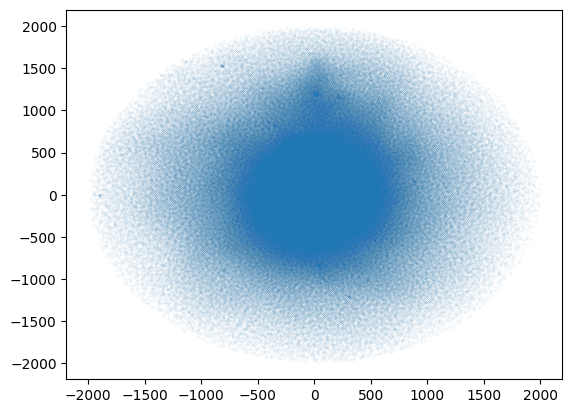

In [71]:
plt.scatter(diffpos[i][:,0],diffpos[i][:,2],s=0.001)

In [81]:
grid_limits =  np.array([-1,1,-1,1,-1,1], dtype=np.float64)*2000
grid_size = (128,128,128)
tstart=perf_counter()
vel_field_smooth = gt.smooth_to_grid(diffpos[i], diffvel[i], grid_size, grid_limits, method="CIC")
tfinish=perf_counter()
print(f"Finished smoothing velocity field from point data in {tfinish-tstart:.4f}\n")


Finished smoothing velocity field from point data in 0.1515



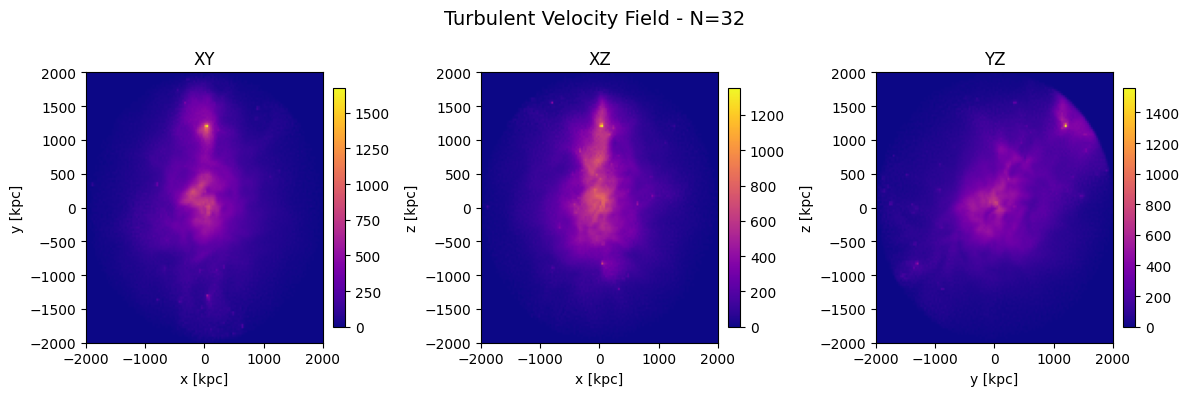

In [82]:
fig, axes = gt.plot_3d_projections(vel_field_smooth, grid_limits, mode='projection', slice_width=3, projection='mean', cmap='plasma', units='kpc', title="Turbulent Velocity Field - N=32")
